## Document/Word Visualization using Embedding

1. MDS
1. LLE
1. ISOMAP
1. t-SNE

## Create document-term matrix

In [1]:
corpus_fname = '../../../data/corpus_10days/news/2016-10-24_article_all_normed.txt'

import sys
sys.path.append('../mypy/')

from corpus import Corpus
corpus = Corpus(corpus_fname, iter_sent=False)
len(corpus)

In [2]:
import pickle

with open('tmp/extracted_noun_dict.pkl', 'rb') as f:
    noun_dict = pickle.load(f)
    
def custom_tokenize(doc):    
    def parse_noun(token):
        for e in reversed(range(1, len(token)+1)):
            subword = token[:e]
            if subword in noun_dict:
                return subword
        return ''
    
    nouns = [parse_noun(token) for token in doc.split()]
    nouns = [word for word in nouns if word]
    return nouns

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from scipy.io import mmwrite, mmread

vectorizer = CountVectorizer(tokenizer=custom_tokenize)
x = vectorizer.fit_transform(corpus)

In [4]:
x.shape

(26368, 4768)

In [5]:
index2word = [word for word, idx in sorted(vectorizer.vocabulary_.items(), key=lambda x:x[1])]
for word in index2word[:3]:
    print(word, vectorizer.vocabulary_[word])

00 0
000원 1
01 2


In [6]:
x = x.transpose()
print('term2doc matrix shape = %s, num term = %d' % (str(x.shape), len(index2word)))

term2doc matrix shape = (4768, 26368), num term = 4768


In [7]:
x_dense = x.todense()

In [8]:
from sklearn.preprocessing import normalize
x_dense = normalize(x_dense, axis=1, norm='l2')

/home/lovit/anaconda2/envs/jupyter_server_py3/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by the normalize function.
  warnings.warn(msg, DataConversionWarning)


In [9]:
sum(x_dense[0] **2)

0.99999999999998401

## Import matplotlib
## 각자의 OS에서 사용할 수 있는 폰트 확인

In [35]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

list(matplotlib.font_manager.get_fontconfig_fonts())[:5]

/home/lovit/anaconda2/envs/jupyter_server_py3/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


['/usr/share/fonts/truetype/freefont/FreeSans.ttf',
 '/usr/share/fonts/truetype/ubuntu-font-family/Ubuntu-B.ttf',
 '/usr/share/fonts/truetype/tlwg/Garuda-Bold.ttf',
 '/usr/share/fonts/truetype/fonts-japanese-gothic.ttf',
 '/usr/share/fonts/truetype/kacst/KacstOffice.ttf']

In [36]:
krfont = {'family' : 'nanumgothic', 'weight' : 'bold', 'size'   : 10}
matplotlib.rc('font', **krfont)

## t-SNE

In [12]:
%%time 

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
y_tsne = tsne.fit_transform(x_dense)

y_tsne.shape

(4768, 2)

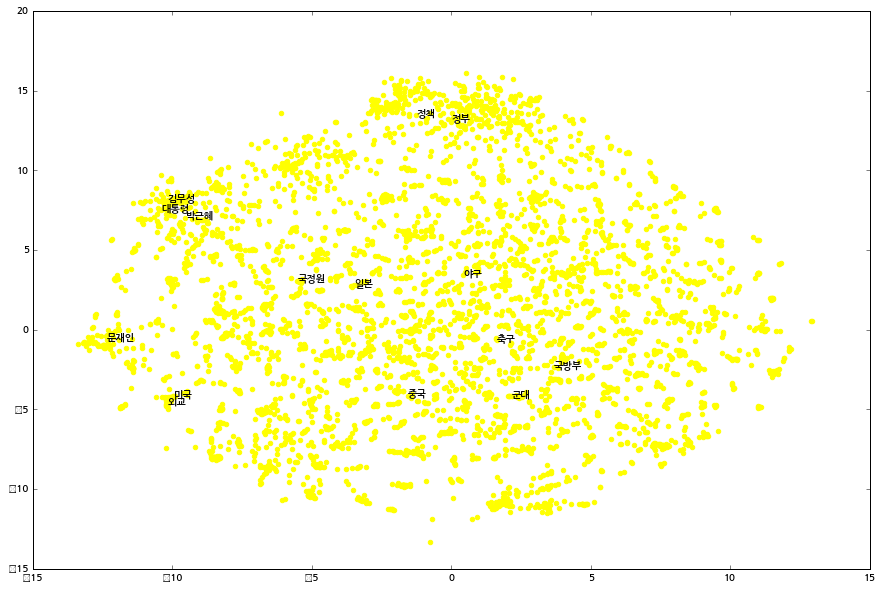

In [47]:
plt.figure(figsize=(15,10))
plt.scatter(y_tsne[:,0], y_tsne[:,1], color='yellow')

for word in ['김무성', '박근혜', '문재인', '국방부', '정부', '국정원', '대통령', '축구', '야구', '외교', '정책', '군대', '미국', '일본', '중국']:
    idx = vectorizer.vocabulary_.get(word, -1)
    if idx == -1:
        continue
    plt.annotate(word, (y_tsne[idx, 0], y_tsne[idx, 1]))

plt.show()

## MDS

In [48]:
%%time 

from sklearn.manifold import MDS

mds = MDS(n_components=2)
y_mds = mds.fit_transform(x_dense)

y_mds.shape

CPU times: user 40min 19s, sys: 2min 19s, total: 42min 38s
Wall time: 8min 53s


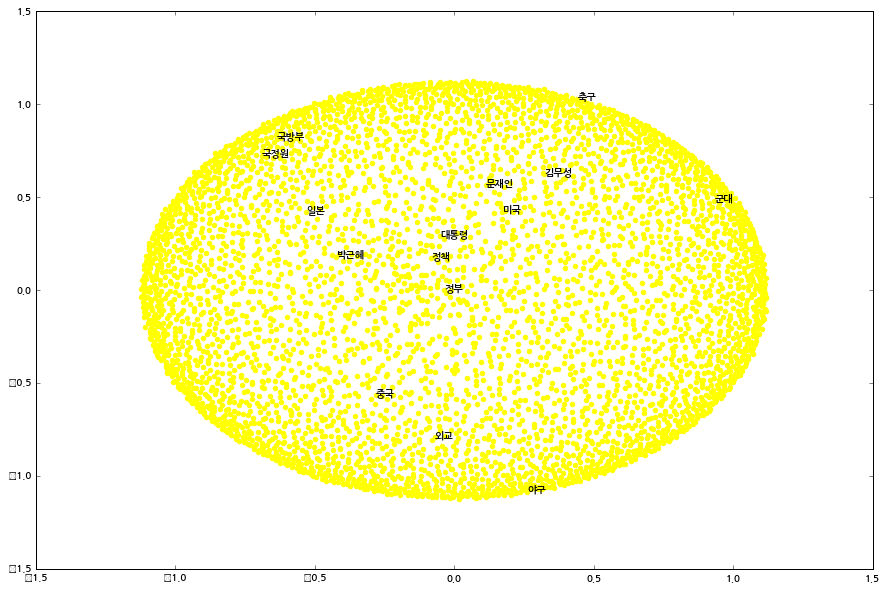

In [49]:
plt.figure(figsize=(15,10))
plt.scatter(y_mds[:,0], y_mds[:,1], color='yellow')

for word in ['김무성', '박근혜', '문재인', '국방부', '정부', '국정원', '대통령', '축구', '야구', '외교', '정책', '군대', '미국', '일본', '중국']:
    idx = vectorizer.vocabulary_.get(word, -1)
    if idx == -1:
        continue
    plt.annotate(word, (y_mds[idx, 0], y_mds[idx, 1]))

plt.show()

## LLE

In [50]:
%%time 

from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2)
y_lle = lle.fit_transform(x_dense)

y_lle.shape

CPU times: user 16min 1s, sys: 2.07 s, total: 16min 3s
Wall time: 14min 41s


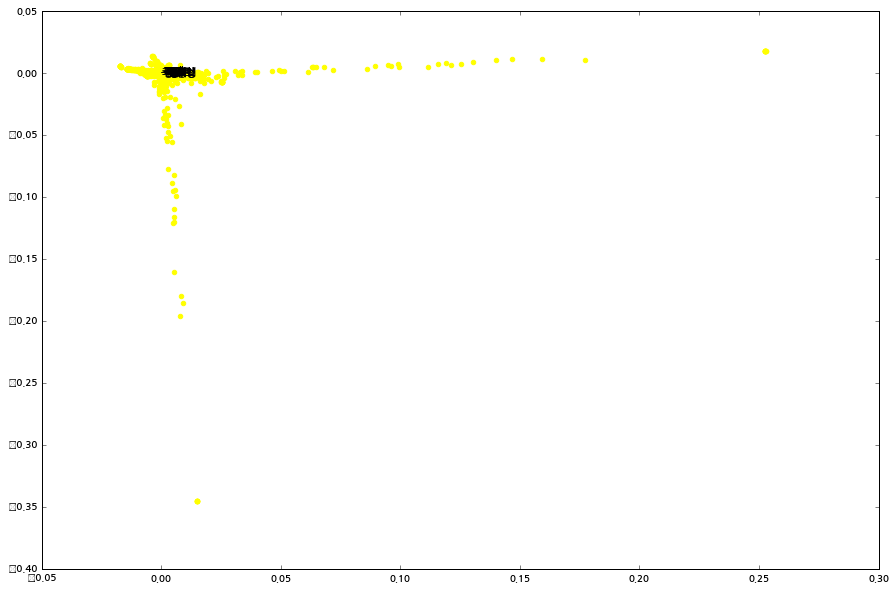

In [51]:
plt.figure(figsize=(15,10))
plt.scatter(y_lle[:,0], y_lle[:,1], color='yellow')

for word in ['김무성', '박근혜', '문재인', '국방부', '정부', '국정원', '대통령', '축구', '야구', '외교', '정책', '군대', '미국', '일본', '중국']:
    idx = vectorizer.vocabulary_.get(word, -1)
    if idx == -1:
        continue
    plt.annotate(word, (y_lle[idx, 0], y_lle[idx, 1]))

plt.show()

## ISOMAP

In [52]:
%%time 

from sklearn.manifold import Isomap

isomap = Isomap(n_components=2)
y_isomap = isomap.fit_transform(x_dense)

y_isomap.shape

CPU times: user 14min 33s, sys: 128 ms, total: 14min 33s
Wall time: 14min 30s


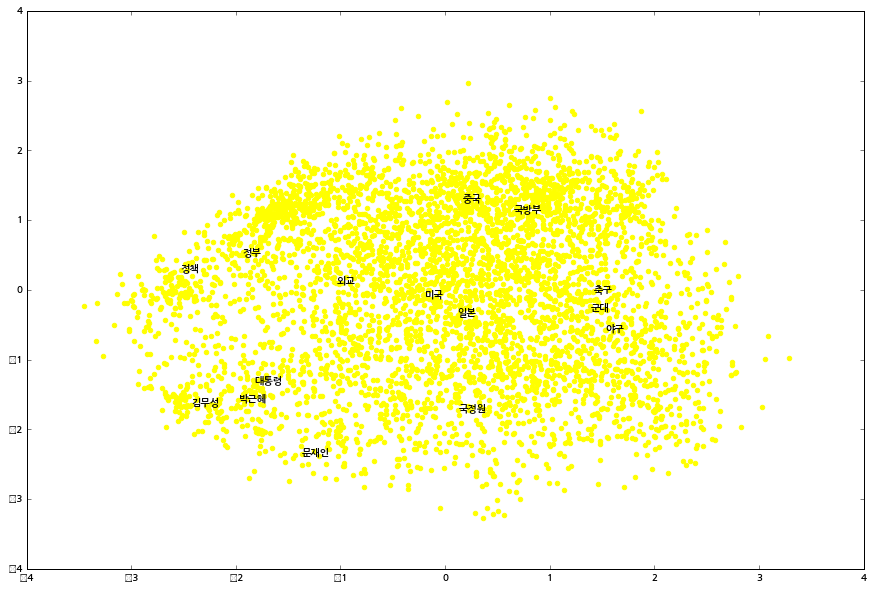

In [53]:
plt.figure(figsize=(15,10))
plt.scatter(y_isomap[:,0], y_isomap[:,1], color='yellow')

for word in ['김무성', '박근혜', '문재인', '국방부', '정부', '국정원', '대통령', '축구', '야구', '외교', '정책', '군대', '미국', '일본', '중국']:
    idx = vectorizer.vocabulary_.get(word, -1)
    if idx == -1:
        continue
    plt.annotate(word, (y_isomap[idx, 0], y_isomap[idx, 1]))

plt.show()